<a href="https://colab.research.google.com/github/Autobot37/jupyter/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import torch
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import IPython.display as ipd

In [13]:
im = Image.open('logo.png')

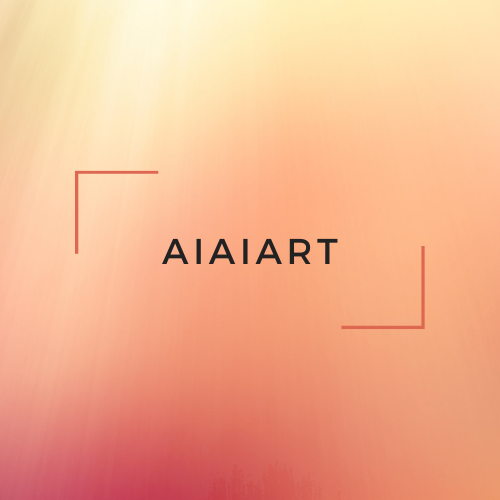

In [14]:
im

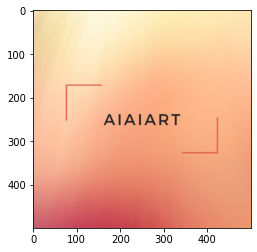

In [18]:
im_array = np.array(im)
plt.imshow(im_array)

In [20]:
c_f = torch.tensor(im_array).permute(2,0,1)
c_f.shape

torch.Size([4, 500, 500])

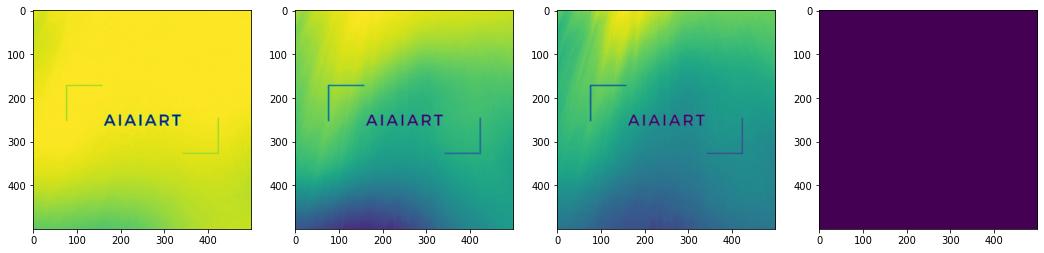

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(18,6))
for i in range(4):
  axs[i].imshow(c_f[i])


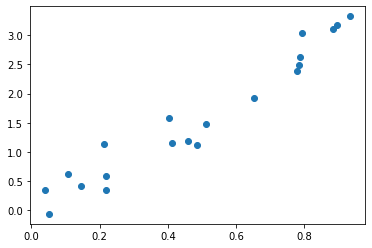

In [23]:
x = torch.rand(20)
y = 3*x + 0.2 + torch.randn(20)*0.3
plt.scatter(x,y)

In [24]:
def rmse(y, y_hat):
  return torch.mean((y-y_hat)**2)**0.5
  

In [29]:
import ipywidgets as widgets
slope = widgets.FloatSlider(min=0,max=5,value=1)
offset = widgets.FloatSlider(min=-1,max=1,value=1)

def get_rmse(slope,offset):
  y_hat = slope*x + offset
  print('RMSE:', rmse(y,y_hat))
  plt.scatter(x,y)
  plt.plot(x, y_hat, c='orange', label=f'y={slope}*x + {offset}')
  plt.legend()

out = widgets.interactive_output(get_rmse, {'slope':slope, 'offset':offset} ) 
display(slope, offset,out)

FloatSlider(value=1.0, max=5.0)

FloatSlider(value=1.0, max=1.0, min=-1.0)

Output()

In [30]:
##for grad checking
#a = tensor(9.1) and c = sin(a) ,
#a.requires_grad = True
#here , for dc/da , we can define c , then do c.backwards()
#then a.grad will tell dc/da

step 0 loss tensor(1.5503, grad_fn=<PowBackward0>)
step 20 loss tensor(0.5569, grad_fn=<PowBackward0>)
step 40 loss tensor(0.3703, grad_fn=<PowBackward0>)
step 60 loss tensor(0.2833, grad_fn=<PowBackward0>)
step 80 loss tensor(0.2657, grad_fn=<PowBackward0>)


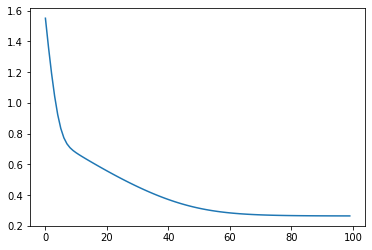

In [37]:
w = torch.rand(2)
w.requires_grad = True

optimizer = torch.optim.SGD([w], lr=0.2)

losses = []
ws = []

for i in range(100):
  optimizer.zero_grad()

  y_hat = w[0]*x + w[1]

  loss = rmse(y, y_hat)

  losses.append(loss.detach().item())#we dont have to track grad here
  ws.append(w.clone().detach())

  if i % 20 ==0: #store loss in a while
    print('step',i,'loss',loss)

  loss.backward()
  optimizer.step()

plt.plot(losses)


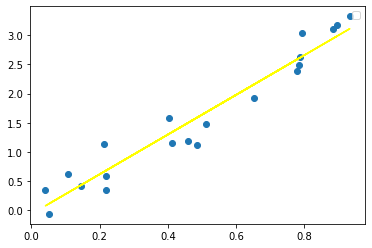

In [38]:
plt.scatter(x,y)
y_hat = w[0]*x + w[1]
plt.plot(x, y_hat.detach(), c='yellow')
plt.legend()


In [36]:
w.grad

tensor([-0.0180,  0.0095])